In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
n = 3
%matplotlib inline

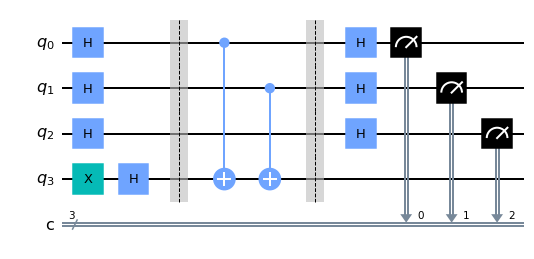

In [3]:
qc = QuantumCircuit(n+1,n)
qc.x(n)
for i in range(0,n+1):
    qc.h(i)
qc.barrier()
s = '011'
s = s[::-1]
for i in range(0,n):
    if s[i] == '1':
        qc.cx(i,n)
qc.barrier()
for i in range(0,n):
    qc.h(i)
for j in range(0,n):
    qc.measure(j,j)
display(qc.draw('mpl'))


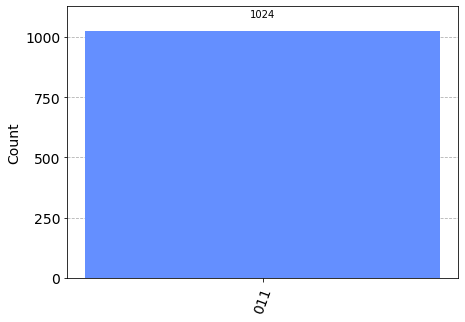

In [4]:
simulator = Aer.get_backend('aer_simulator')
result = execute(qc,backend = simulator).result()
plot_histogram(result.get_counts())


In [9]:
provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.tools.monitor import job_monitor
qcomp = provider.get_backend('ibmq_belem')
job = execute(qc,backend = qcomp)
job_monitor(job)


Job Status: job has successfully run


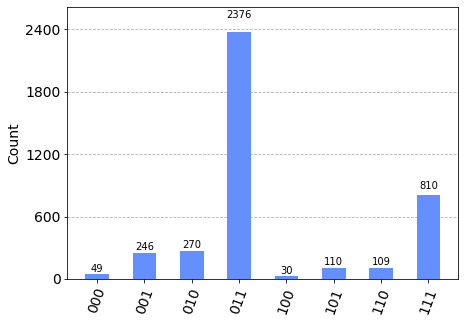

In [10]:
result = job.result()
plot_histogram(result.get_counts())